In [1]:
la_data <- read.csv("la_scaled.csv")
head(la_data)

,Date.Occurred,DR.Number,Date.Reported,Time.Occurred,Area.ID,Reporting.District,Crime.Code,MO.Codes,Victim.Age,Victim.Sex,Victim.Descent,Premise.Code
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>
1,2015-03-05,151107103,2015-03-05,1700,11,1142,997,3101 3401 3701 3006 3030,99,3,12,101
2,2017-05-04,171609083,2017-05-04,1445,16,1657,997,3004 3026 3104 3401 3701 4026 3037,33,3,12,101
3,2019-08-05,191219991,2019-08-05,1530,12,1232,997,0605 3037 3004 3028 3030 3101 4012,49,3,7,101
4,2020-06-25,201710390,2020-06-26,1855,17,1752,997,3004 3037 3034 3028 3101 4026,26,3,17,101
5,2012-05-14,120409641,2012-05-14,935,4,453,997,3026 3036 3101 3401 3701 3004,49,3,7,101
6,2022-05-27,220709724,2022-05-27,1500,7,706,997,3006 3028 4027 3034 3037 3101 3401 3701,44,3,7,101


In [2]:
la_data_numeric <- la_data[sapply(la_data, is.numeric)]
head(la_data_numeric)

,DR.Number,Time.Occurred,Area.ID,Reporting.District,Crime.Code,Victim.Age,Victim.Sex,Victim.Descent,Premise.Code
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
1,151107103,1700,11,1142,997,99,3,12,101
2,171609083,1445,16,1657,997,33,3,12,101
3,191219991,1530,12,1232,997,49,3,7,101
4,201710390,1855,17,1752,997,26,3,17,101
5,120409641,935,4,453,997,49,3,7,101
6,220709724,1500,7,706,997,44,3,7,101


In [3]:
library(proxy)


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix




In [4]:
cos_sim_matrix <- proxy::simil(x = as.matrix(la_data_numeric), method = "cosine")
cos_dist_matrix <- as.dist(1 - cos_sim_matrix)

In [5]:
hc_cosine <- hclust(cos_dist_matrix, method = "complete")

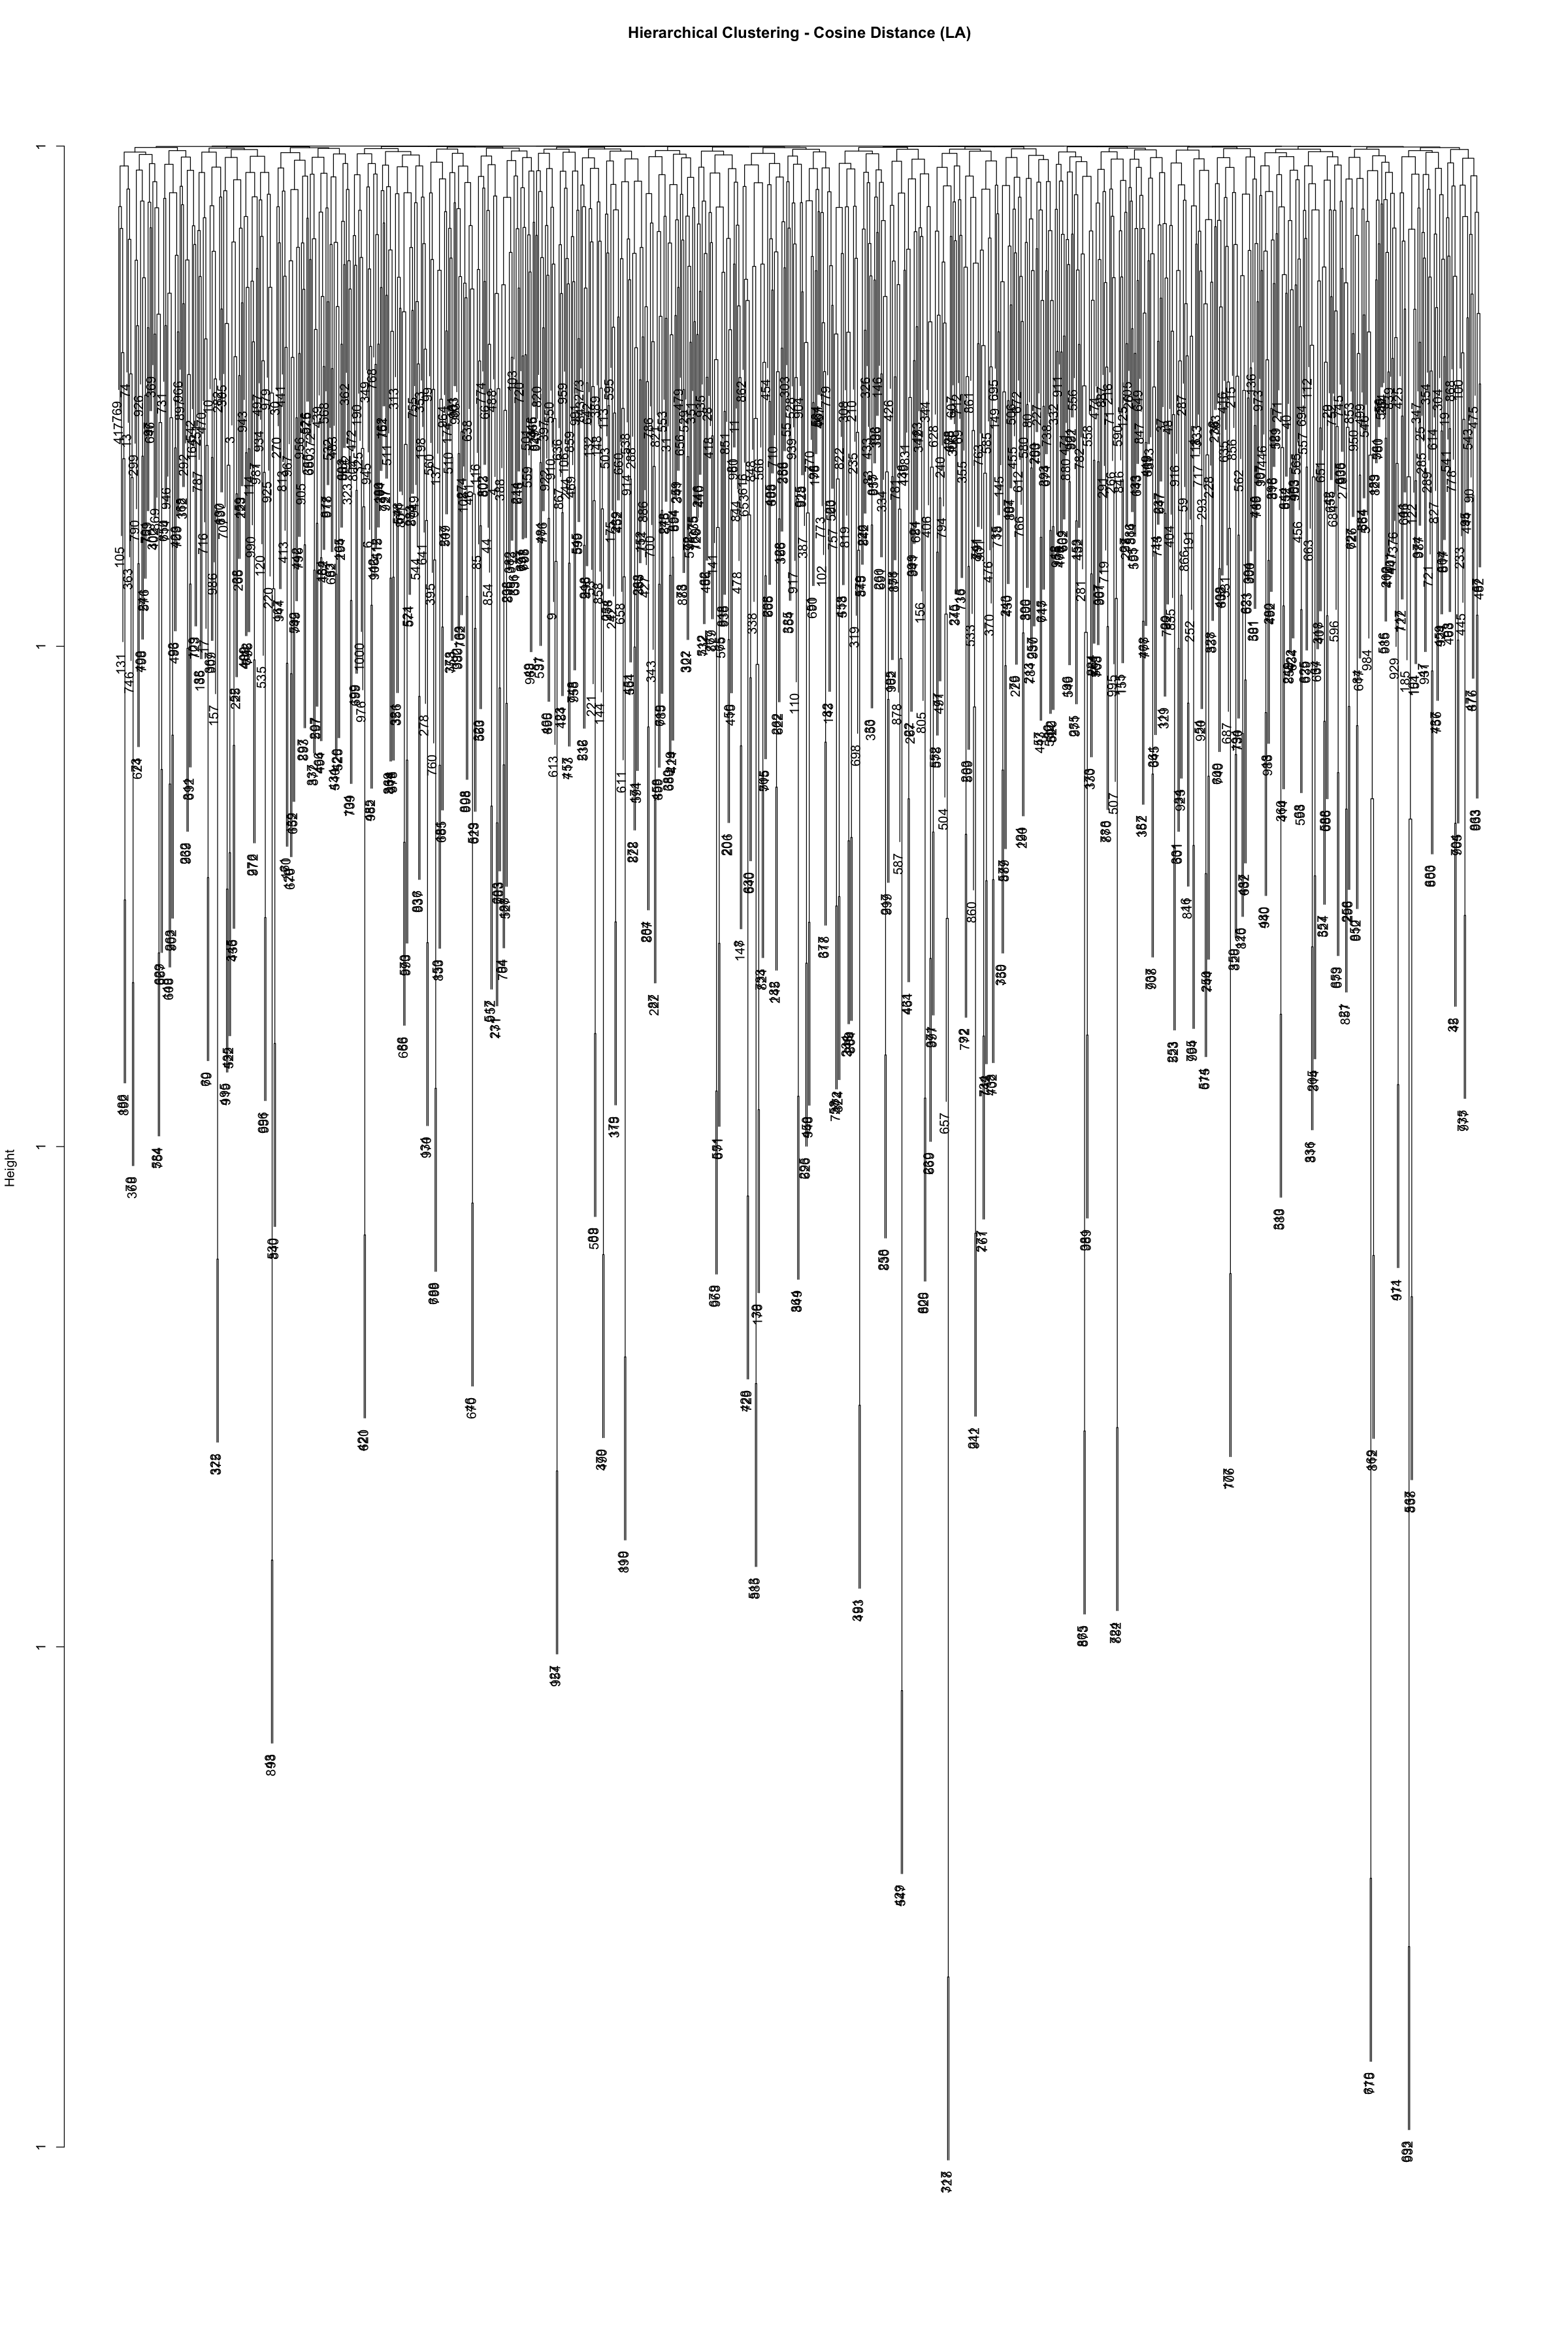

In [37]:
plot(hc_cosine, main = "Hierarchical Clustering - Cosine Distance (LA)", xlab = "", sub = "")

In [7]:
clusters_cosine <- cutree(hc_cosine, k = 5)

la_data_numeric$cluster_cosine <- clusters_cosine

head(la_data_numeric)

,DR.Number,Time.Occurred,Area.ID,Reporting.District,Crime.Code,Victim.Age,Victim.Sex,Victim.Descent,Premise.Code,cluster_cosine
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>
1,151107103,1700,11,1142,997,99,3,12,101,1
2,171609083,1445,16,1657,997,33,3,12,101,1
3,191219991,1530,12,1232,997,49,3,7,101,2
4,201710390,1855,17,1752,997,26,3,17,101,3
5,120409641,935,4,453,997,49,3,7,101,1
6,220709724,1500,7,706,997,44,3,7,101,3


In [8]:
library(circlize)
library(dendextend)

circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))



---------------------
Welcome to dendextend version 1.17.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
----------------

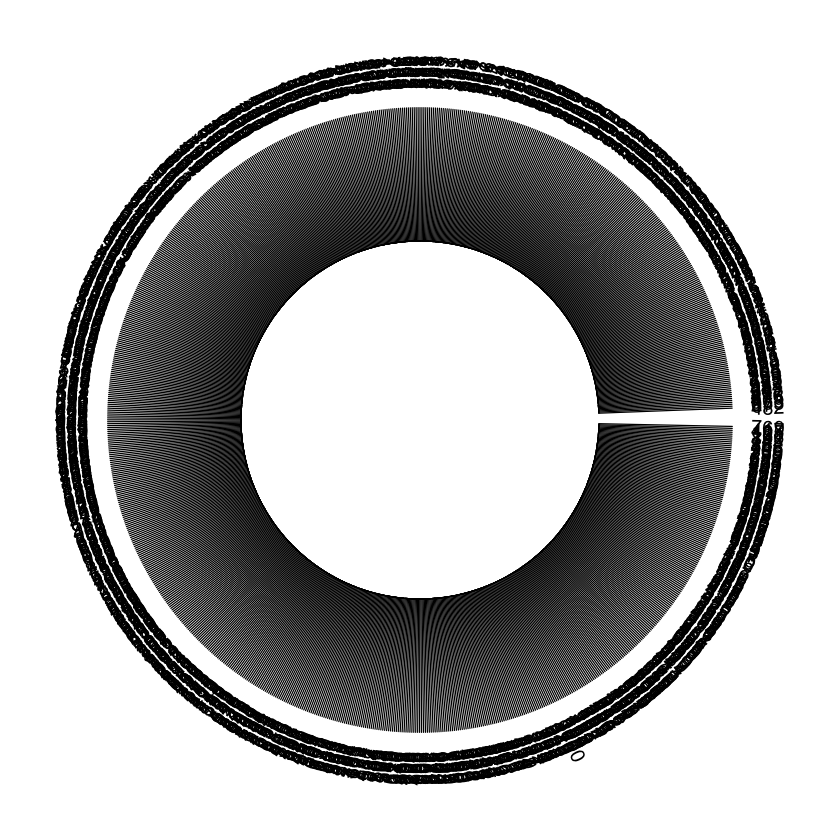

In [9]:
dend <- as.dendrogram(hc_cosine)

circlize_dendrogram(dend, dend_track_height = 0.4)

In [10]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
sampled_data <- la_data_numeric %>% 
  sample_n(50)

In [12]:
cos_sim_matrix1 <- proxy::simil(x = as.matrix(sampled_data), method = "cosine")
cos_dist_matrix1 <- as.dist(1 - cos_sim_matrix1)

In [13]:
hc_cosine1 <- hclust(cos_dist_matrix1, method = "complete")

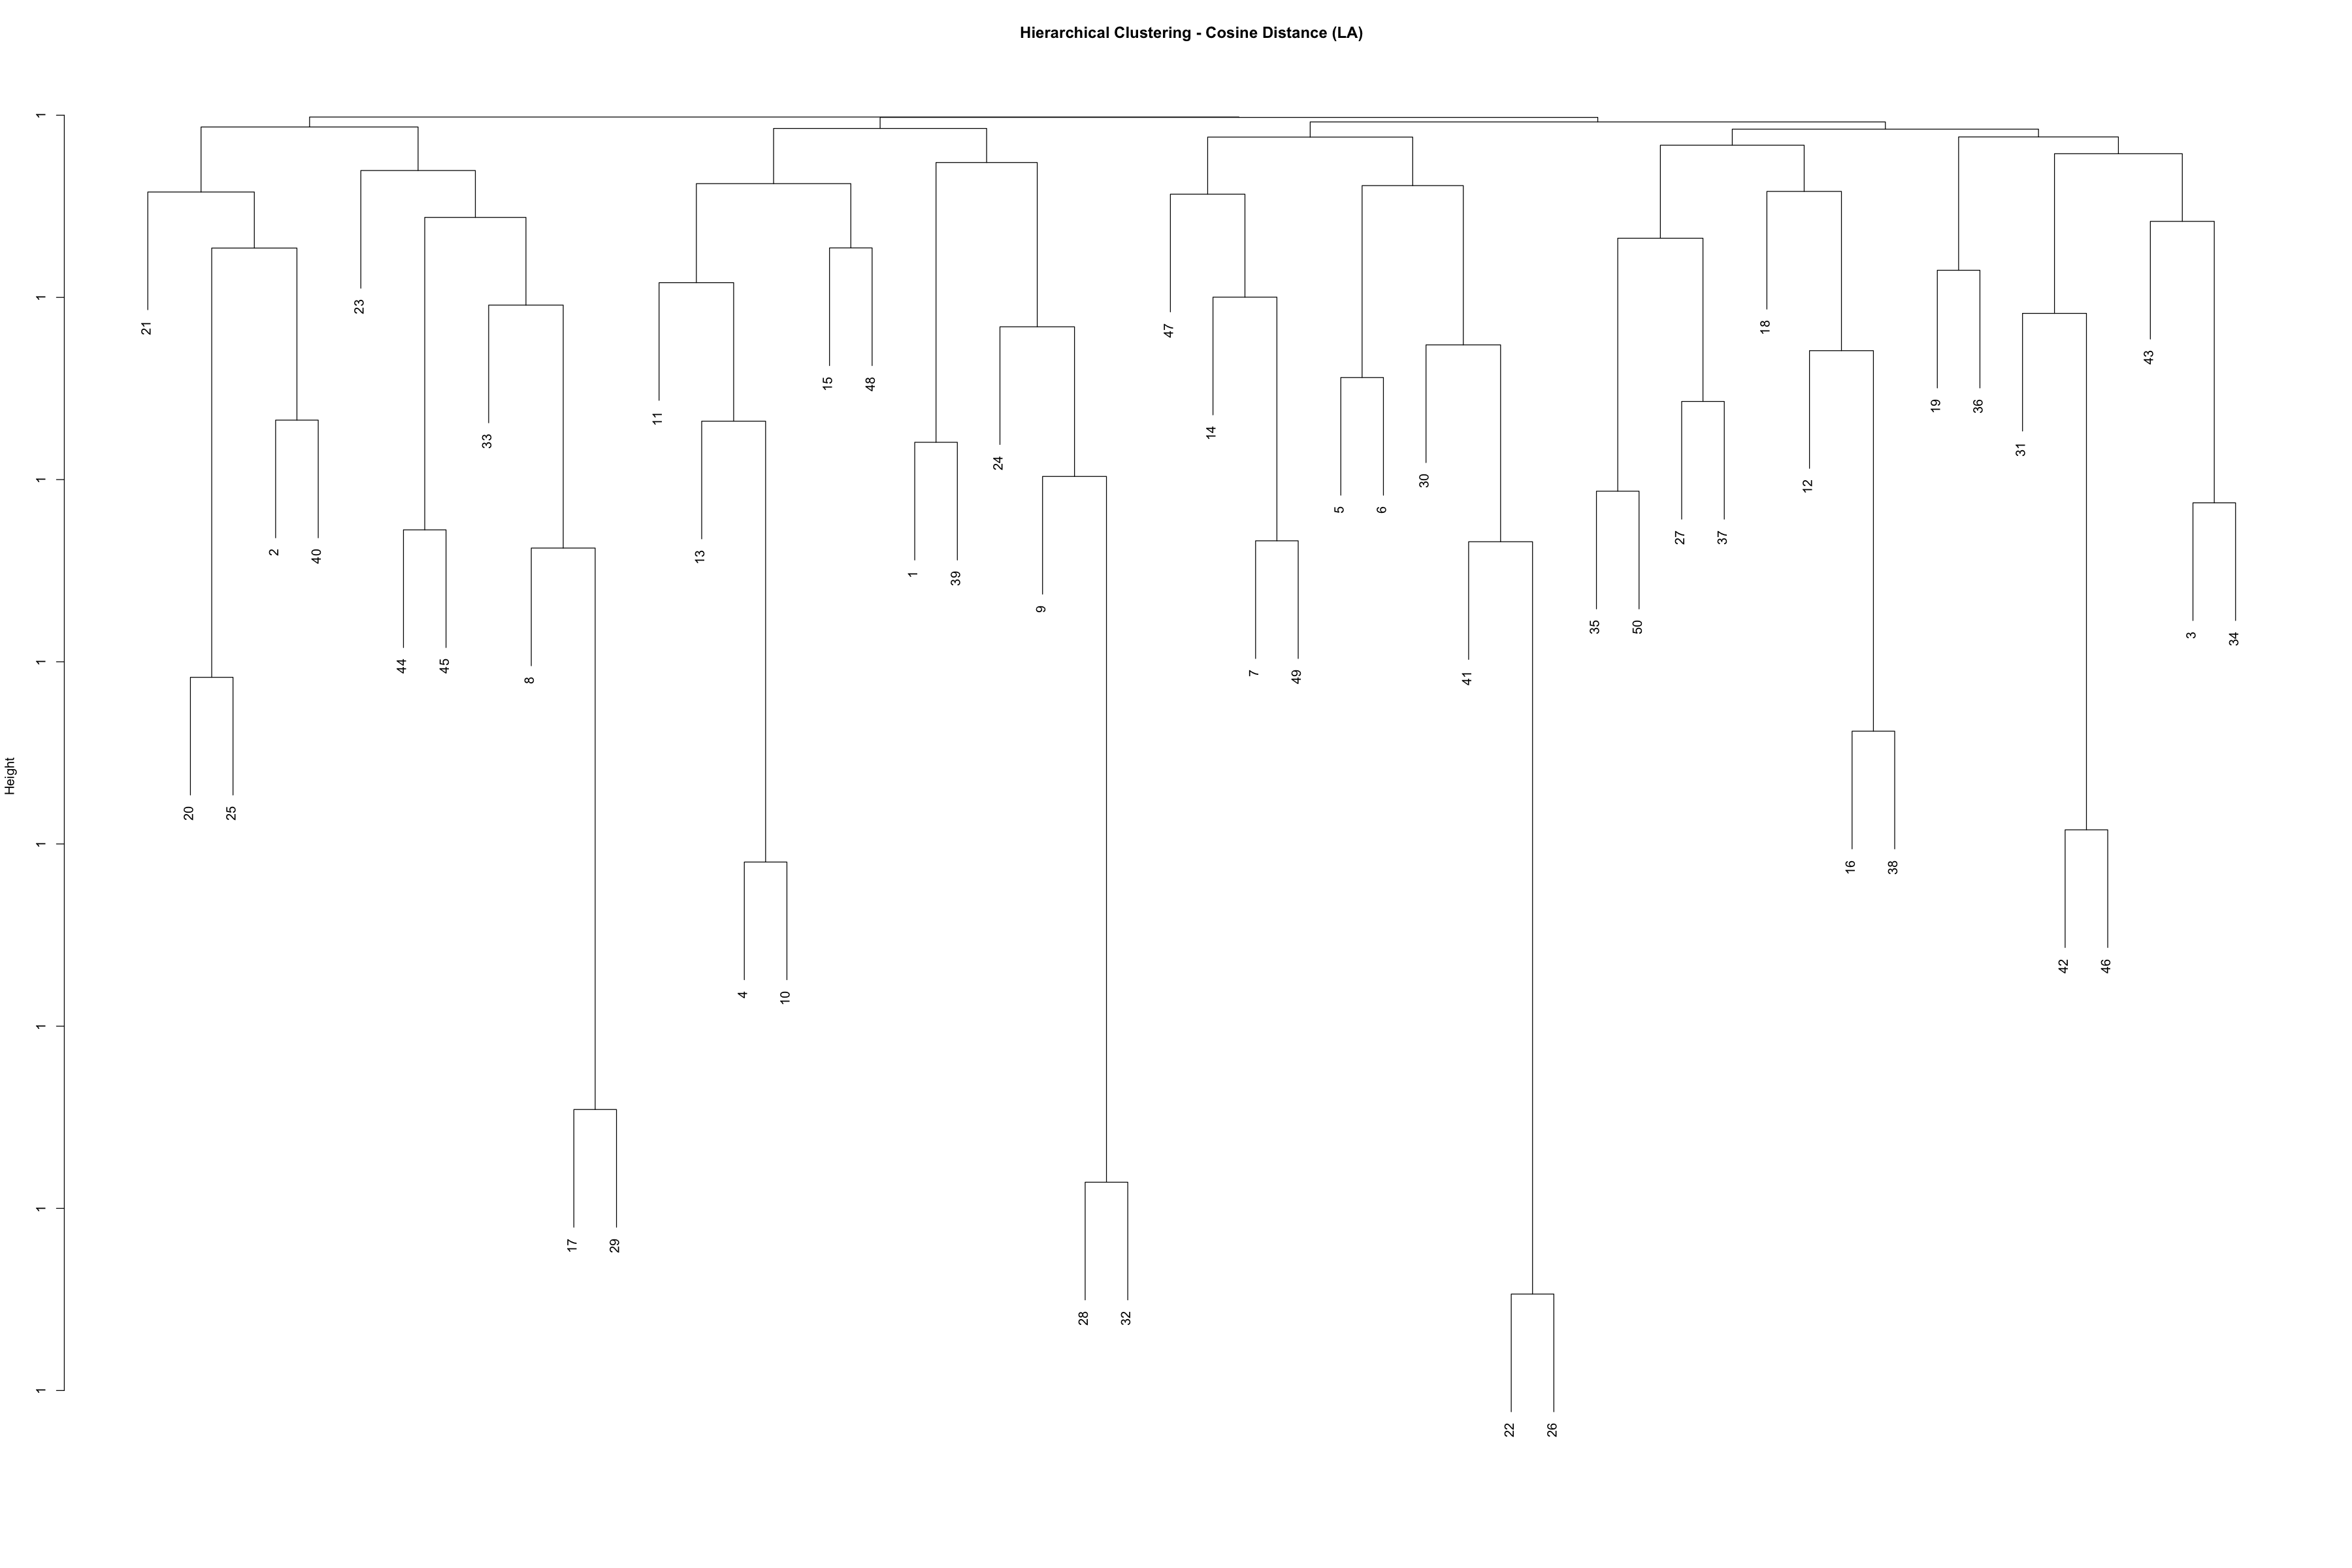

In [41]:
options(repr.plot.width = 30, repr.plot.height = 20)
plot(hc_cosine1, main = "Hierarchical Clustering - Cosine Distance (LA)", xlab = "", sub = "", )

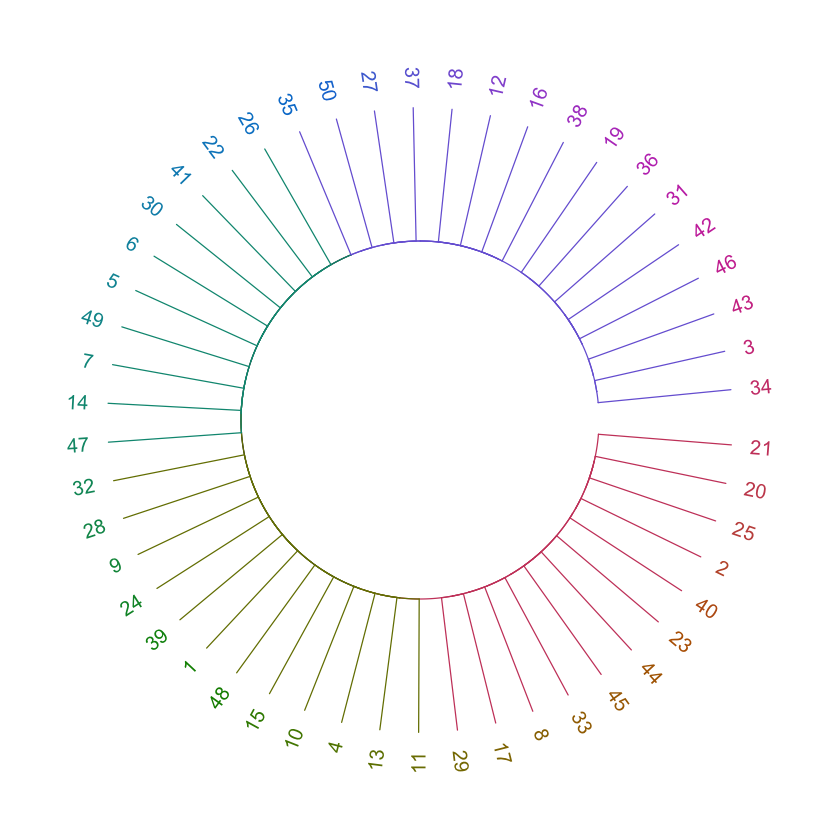

In [15]:
dend1 <- as.dendrogram(hc_cosine1)
dend1 <- dend1 %>% 
   color_branches(k=4) %>% 
   color_labels
circlize_dendrogram(dend1, dend_track_height = 0.4)